<h1 style="color: #00BFFF;">00 |</h1>

After sleeping through a hundred million centuries... we have finally opened our eyes on a sumptuous planet, sparkling with color, bountiful with life.

Within decades we must close our eyes again... 

Isn't it a noble and enlightened way of spending our brief time in the sun? 

To work at understanding... the universe and how we have come to wake up in it?

― Richard Dawkins

In [32]:
# 📚 Basic libraries
import os # file managment
import numpy as np # numerical python
import pandas as pd # dataframe managment

# 📊 Data Visualization
import matplotlib.pyplot as plt # to olot and visualizes
from PIL import Image # Image data visualization module from Python Imaging Library

# 📦 Others
import warnings # who likes warnings?
import shutil # images folder managment
import random # random samples

# 🌐 Computer Vision
import tensorflow as tf # machine learning
from tensorflow import keras # neural networks; it runs on top of TensorFlow
from tensorflow.keras import layers # sets of neurons
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Dense

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Activation, GlobalMaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# 🧮 Evaluation metrics
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay # roc curve, confussion matrix & displayer
from sklearn.metrics import classification_report # Metrics to check & compare our score

In [33]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [34]:
# 🎯 Specific functions
def make_model(input_shape): # Making some changes to the previous model
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs, x)

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [35]:
# Shamelessly copied from ~nicknochnack tutorial for Image Classification
# This code makes TensorFlow to gradually use my GPU memory, instead of taking it all at once from the beginning
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [36]:
data_path = os.path.join(os.getcwd(), "data") # string with current directory + data folder

solution_file = os.path.join(data_path, 'training_solutions_rev1.csv') # CSV with galaxy classifications
training_images = os.path.join(data_path, "images_training_rev1") # training images
test_images = os.path.join(data_path, "images_test_rev1") # test images|

In [37]:
# read csv
df = pd.read_csv(solution_file)
df.columns = [col.lower().replace('.', '_') for col in df.columns] # the good old habits
df.head(5)

,galaxyid,class1_1,class1_2,class1_3,class2_1,class2_2,class3_1,class3_2,class4_1,class4_2,class5_1,class5_2,class5_3,class5_4,class6_1,class6_2,class7_1,class7_2,class7_3,class8_1,class8_2,class8_3,class8_4,class8_5,class8_6,class8_7,class9_1,class9_2,class9_3,class10_1,class10_2,class10_3,class11_1,class11_2,class11_3,class11_4,class11_5,class11_6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

<h3 style="color: #008080;">Defning the threshold for spiral galaxies</h3>

In [38]:
# 'class1_2' represents the probability of the galaxy having features or a disk
# 'class4_1' is the probability of having a visible bulge
# 'class6_1' is the probability of seeing a spiral arm pattern

# Any galaxy that has 50% > will be considered a spiral
s_threshold  = (df['class1_2'] > 0.5) & (df['class4_1'] > 0.5) & (df['class6_1'] > 0.5)
spirals = df[s_threshold][['galaxyid']]

# Any galaxy that has <= 50% will be considered a non-spiral
n_threshold = (df['class1_2'] <= 0.5) | (df['class4_1'] <= 0.5) | (df['class6_1'] <= 0.5)
non_spirals = df[n_threshold][['galaxyid']]

In [39]:
# Create a combined DataFrame just to compare
data = pd.concat([spirals, non_spirals]).drop_duplicates().reset_index(drop=True)

# Add the 'spiral' and 'non_spiral' columns
data['spiral'] = data['galaxyid'].isin(spirals['galaxyid']).astype(int)
data['non_spiral'] = data['galaxyid'].isin(non_spirals['galaxyid']).astype(int)
data.head(5)

,galaxyid,spiral,non_spiral
0,100134,1,0
1,101756,1,0
2,102243,1,0
3,102474,1,0
4,104001,1,0


In [40]:
spirals.head(5)

,galaxyid
8,100134
127,101756
162,102243
176,102474
276,104001


In [41]:
# Create a combined DataFrame just to compare
data = pd.concat([spirals, non_spirals]).drop_duplicates().reset_index(drop=True)

# Add the 'spiral' and 'non_spiral' columns
data['spiral'] = data['galaxyid'].isin(spirals['galaxyid']).astype(int)
data['non_spiral'] = data['galaxyid'].isin(non_spirals['galaxyid']).astype(int)
data.head(5)

,galaxyid,spiral,non_spiral
0,100134,1,0
1,101756,1,0
2,102243,1,0
3,102474,1,0
4,104001,1,0


In [42]:
# Obssesive checker is me
non_spiral_check = data[data['spiral'] == 0] # Just to visualize non_spiral
non_spiral_check.head(5)

,galaxyid,spiral,non_spiral
1549,100008,0,1
1550,100023,0,1
1551,100053,0,1
1552,100078,0,1
1553,100090,0,1


<h3 style="color: #008080;">New directories for spirals and non-spirals galaxies</h3>

In [43]:
# The original dataset was unlabeled, not we can label our images for either spiral or not
spirals_dir = os.path.join(data_path, "spirals")
non_spirals_dir = os.path.join(data_path, "non_spirals")

# Making sure new directories do not overwrite previous ones ~ Sabina awesomeness
os.makedirs(spirals_dir, exist_ok=True)
os.makedirs(non_spirals_dir, exist_ok=True)

<h3 style="color: #008080;">Copying training images to their new directories based on the labels</h3>

for image_file in os.listdir(training_images):
    # Extracting the galaxy_id
    galaxy_id = int(os.path.splitext(image_file)[0]) # splitext to get galaxy_id and .jpg, we select [0] = id and convert it to an integer
    source = os.path.join(training_images, image_file)
    if galaxy_id in spirals.values:
        dest = os.path.join(spirals_dir, image_file)
    elif galaxy_id in non_spirals.values:
        dest = os.path.join(non_spirals_dir, image_file)
    else:
        continue  # if galaxy_id is not classified as either, do not copy the file
    shutil.copy(source, dest) # copying files from their source to the new destinations
    
# We use shutil.copy instead of .move because moving the images erased them from previous directories, and sometimes that triggered some errors when I had to run the code again after making some changes

<h3 style="color: #008080;">Printing a sample of each new labeled image</h3>

Sample spiral galaxy images:


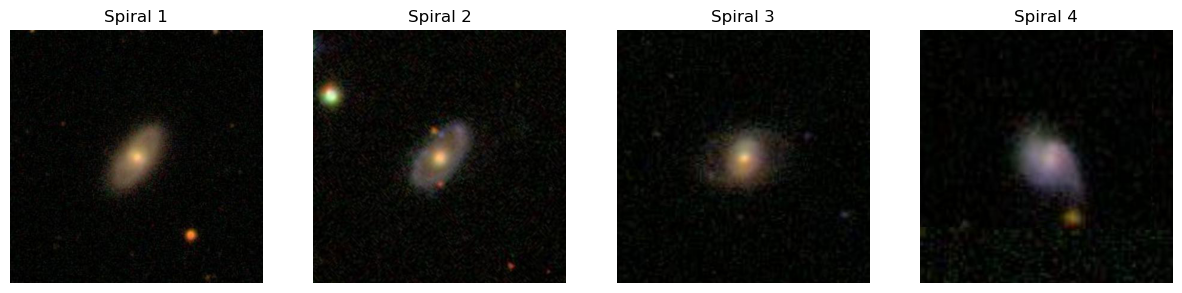


Sample non-spiral galaxy images:


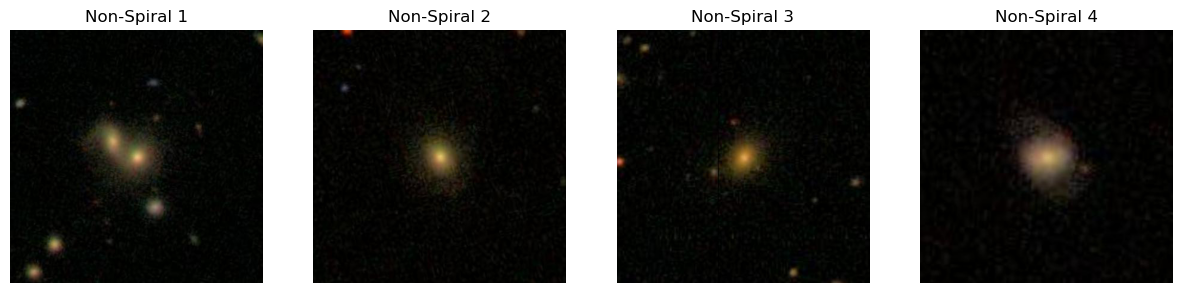

In [44]:
# Sample spiral galaxy images
print("Sample spiral galaxy images:")
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
random_spiral_images = random.sample(os.listdir(spirals_dir), 4)
for i, image in enumerate(random_spiral_images):
    img = Image.open(os.path.join(spirals_dir, image))
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(f"Spiral {i+1}")
plt.show()

# Sample non-spiral galaxy images
print("\nSample non-spiral galaxy images:")
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
random_non_spiral_images = random.sample(os.listdir(non_spirals_dir), 4)
for i, image in enumerate(random_non_spiral_images):
    img = Image.open(os.path.join(non_spirals_dir, image))
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(f"Non-Spiral {i+1}")
plt.show()

In [45]:
# Checking their distributions
original_counts = {
    'Spiral': len(os.listdir(spirals_dir)),
    'Non-Spiral': len(os.listdir(non_spirals_dir))
}

print(f"Number of spiral images: {original_counts['Spiral']}")
print(f"Number of non-spiral images: {original_counts['Non-Spiral']}")

Number of spiral images: 1549
Number of non-spiral images: 60029


<h3 style="color: #008080;">Dealing with imbalance Data</h3>

In [46]:
# There is some class imbalance, that can lead to a biased model towards the majority class (non-spiral galaxies)
# In previous attempts, we used Data Augmentation to create new spiral images --> it took too long and crashed my computer
# For this attempt, we will simply create two subsets of 500 images each

In [47]:
# Directories for the subsets
subset_dir = os.path.join(data_path, "galaxies")

# Making sure new directories do not overwrite previous ones
os.makedirs(subset_dir, exist_ok=True)

In [48]:
# Directories for the subsets
train_dir = os.path.join(subset_dir, "train")
val_dir = os.path.join(subset_dir, "validation")

# Making sure new directories do not overwrite previous ones
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [49]:
# Subdirectories for spirals and non-spirals
train_spirals_dir = os.path.join(train_dir, "spirals")
train_non_spirals_dir = os.path.join(train_dir, "non_spirals")
val_spirals_dir = os.path.join(val_dir, "spirals")
val_non_spirals_dir = os.path.join(val_dir, "non_spirals")

os.makedirs(train_spirals_dir, exist_ok=True)
os.makedirs(train_non_spirals_dir, exist_ok=True)
os.makedirs(val_spirals_dir, exist_ok=True)
os.makedirs(val_non_spirals_dir, exist_ok=True)

In [50]:
# Copy the subset of spiral images to the new training directory
spiral_images = os.listdir(spirals_dir)
non_spiral_images = os.listdir(non_spirals_dir)

In [51]:
# Shuffle the image lists
random.shuffle(spiral_images)
random.shuffle(non_spiral_images)

In [52]:
# Split into training and validation sets
train_spiral_images = spiral_images[:700]
val_spiral_images = spiral_images[700:1000]

train_non_spiral_images = non_spiral_images[:700]
val_non_spiral_images = non_spiral_images[700:1000]

# Copy the training images to the new training directory
for image_file in train_spiral_images:
    source = os.path.join(spirals_dir, image_file)
    dest = os.path.join(train_spirals_dir, image_file)
    shutil.copyfile(source, dest)

for image_file in train_non_spiral_images:
    source = os.path.join(non_spirals_dir, image_file)
    dest = os.path.join(train_non_spirals_dir, image_file)
    shutil.copyfile(source, dest)

# Copy the validation images to the new validation directory
for image_file in val_spiral_images:
    source = os.path.join(spirals_dir, image_file)
    dest = os.path.join(val_spirals_dir, image_file)
    shutil.copyfile(source, dest)

for image_file in val_non_spiral_images:
    source = os.path.join(non_spirals_dir, image_file)
    dest = os.path.join(val_non_spirals_dir, image_file)
    shutil.copyfile(source, dest)

<h3 style="color: #008080;">Printing a sample of each new directories galaxies</h3>

Sample spiral galaxy images (training set):


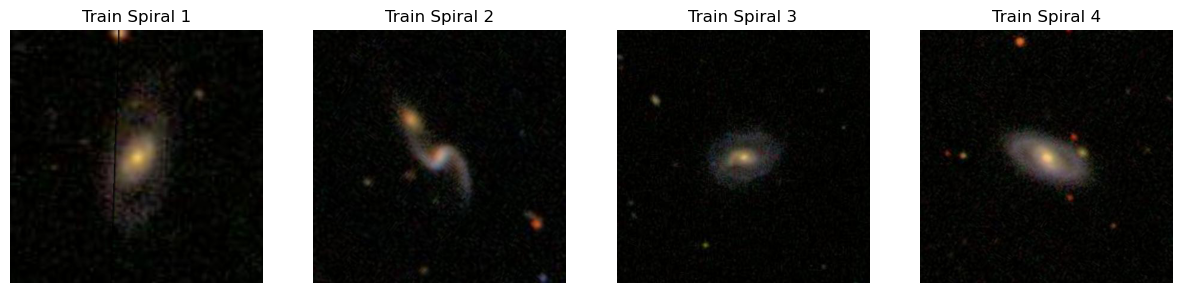


Sample non-spiral galaxy images (training set):


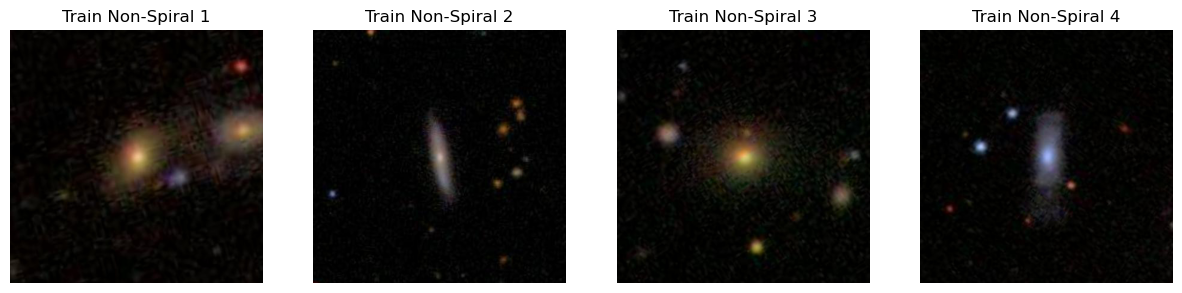


Sample spiral galaxy images (validation set):


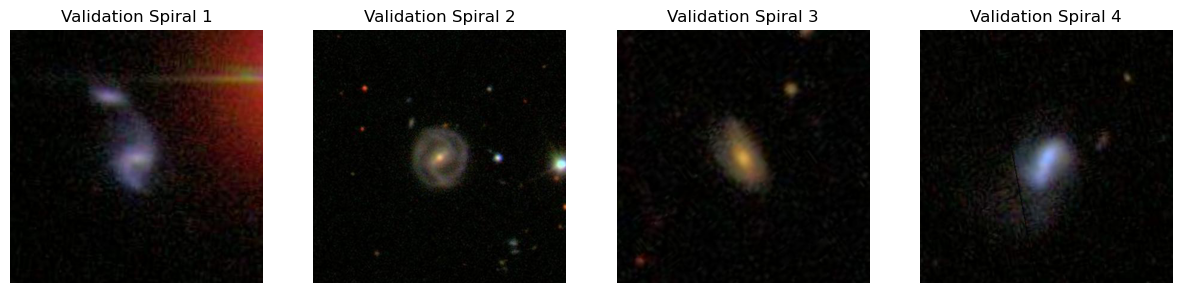


Sample non-spiral galaxy images (validation set):


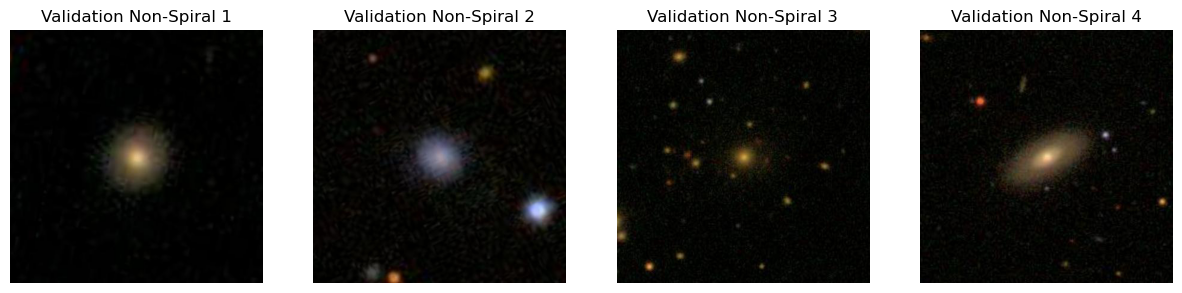

In [53]:
# Sample spiral galaxy images from the training set
print("Sample spiral galaxy images (training set):")
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for i, image in enumerate(os.listdir(train_spirals_dir)[:4]):
    img = Image.open(os.path.join(train_spirals_dir, image))
    ax[i].imshow(img)
    ax[i].axis('off') 
    ax[i].set_title(f"Train Spiral {i+1}")
plt.show()

# Sample non-spiral galaxy images from the training set
print("\nSample non-spiral galaxy images (training set):")
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for i, image in enumerate(os.listdir(train_non_spirals_dir)[:4]):
    img = Image.open(os.path.join(train_non_spirals_dir, image))
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(f"Train Non-Spiral {i+1}")
plt.show()

# Sample spiral galaxy images from the validation set
print("\nSample spiral galaxy images (validation set):")
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for i, image in enumerate(os.listdir(val_spirals_dir)[:4]):
    img = Image.open(os.path.join(val_spirals_dir, image))
    ax[i].imshow(img)
    ax[i].axis('off') 
    ax[i].set_title(f"Validation Spiral {i+1}")
plt.show()

# Sample non-spiral galaxy images from the validation set
print("\nSample non-spiral galaxy images (validation set):")
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for i, image in enumerate(os.listdir(val_non_spirals_dir)[:4]):
    img = Image.open(os.path.join(val_non_spirals_dir, image))
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(f"Validation Non-Spiral {i+1}")
plt.show()

In [54]:
# Count the number of images in training subset
subset_counts = {
    'Spiral': len(os.listdir(train_spirals_dir)),
    'Non-Spiral': len(os.listdir(train_non_spirals_dir))
}

# Print the counts
print(f"Number of spiral images: {subset_counts['Spiral']}")
print(f"Number of non-spiral images: {subset_counts['Non-Spiral']}")

Number of spiral images: 700
Number of non-spiral images: 700


In [55]:
# Count the number of images in each subset
subset_counts2 = {
    'Spiral': len(os.listdir(val_spirals_dir)),
    'Non-Spiral': len(os.listdir(val_non_spirals_dir))
}

# Print the counts
print(f"Number of spiral images: {subset_counts2['Spiral']}")
print(f"Number of non-spiral images: {subset_counts2['Non-Spiral']}")

Number of spiral images: 300
Number of non-spiral images: 300


<h1 style="color: #00BFFF;">03 | Data Pre-Processing</h1>

In [56]:
# Parameters that we can fine-tune later on
img_height = 256   
img_width = 256   
image_size = (img_height, img_width)
batch_size = 128 # using the same as in the tutorial, training utilized in each iteration

In [57]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.3,
)

<h1 style="color: #00BFFF;">04 | Modeling</h1>

<h3 style="color: #008080;">Train and validation data</h3>

In [58]:
# Loading training data
train_ds = datagen.flow_from_directory(
    train_dir, # training directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Loading validation data
val_ds = datagen.flow_from_directory(
    val_dir, # validation directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary' 
)

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


<h3 style="color: #008080;">Model selection</h3>

In [59]:
# Keras model, build on top of TensorFlow
model = make_model(input_shape=image_size + (3,)) # Image size + 3 channels of colors

<h3 style="color: #008080;">Fitting the model</h3>

In [60]:
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [30]:
print(train_ds.class_indices)
print(val_ds.class_indices)

{'non_spirals': 0, 'spirals': 1}
{'non_spirals': 0, 'spirals': 1}


<h3 style="color: #008080;">Training the Model. AKA --> How to crash my computer !</h3>

In [61]:
epochs = 15

callbacks = [
    keras.callbacks.ModelCheckpoint("data/epochs/save_at_{epoch}.keras"),
]

# Train your model without callbacks first
hist = model.fit_generator(
    train_ds, 
    epochs=epochs, 
    validation_data=val_ds,
    callbacks=callbacks,
)

Epoch 1/15
11/11 [==============================] - 118s 11s/step - loss: 1.0498 - accuracy: 0.5043 - val_loss: 0.7370 - val_accuracy: 0.5000
Epoch 2/15
11/11 [==============================] - 115s 11s/step - loss: 0.6981 - accuracy: 0.5014 - val_loss: 0.6920 - val_accuracy: 0.5367
Epoch 3/15
11/11 [==============================] - 121s 11s/step - loss: 0.6895 - accuracy: 0.5514 - val_loss: 0.6880 - val_accuracy: 0.5583
Epoch 4/15
11/11 [==============================] - 158s 15s/step - loss: 0.6866 - accuracy: 0.5400 - val_loss: 0.6840 - val_accuracy: 0.5417
Epoch 5/15
11/11 [==============================] - 153s 14s/step - loss: 0.6829 - accuracy: 0.5479 - val_loss: 0.6751 - val_accuracy: 0.5517
Epoch 6/15
11/11 [==============================] - 120s 11s/step - loss: 0.6663 - accuracy: 0.6321 - val_loss: 0.6538 - val_accuracy: 0.6200
Epoch 7/15
11/11 [==============================] - 112s 10s/step - loss: 0.6483 - accuracy: 0.6543 - val_loss: 0.6214 - val_accuracy: 0.6717
Epoch 

<h1 style="color: #00BFFF;">05 | Model Validation</h1>

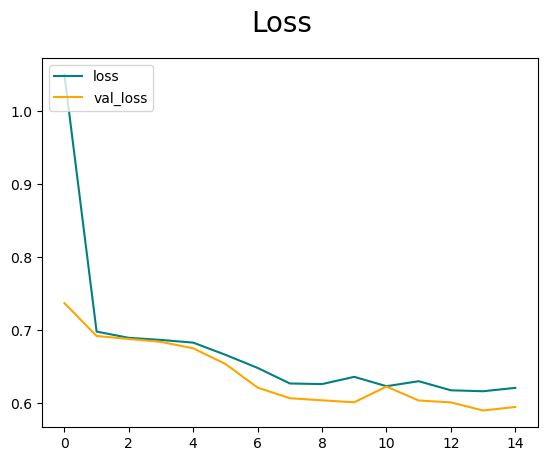

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

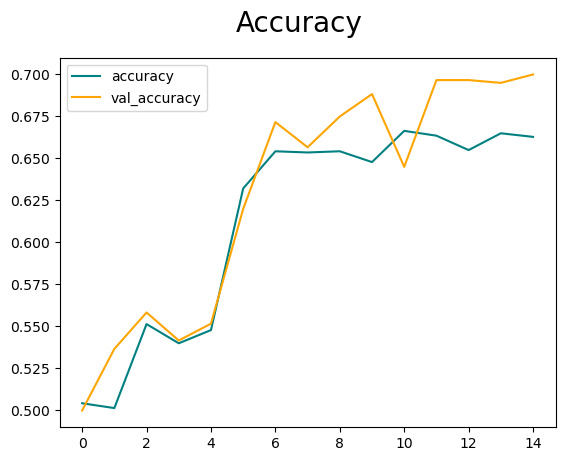

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [71]:
# IT´S SIGMOID
# IT´S SIGMOID !!!!!!!!!!!!!!!!!! YEEEEEEEEEEY

<h3 style="color: #008080;">Not yet finished !</h3>

4/4 [==============================] - 2s 542ms/step


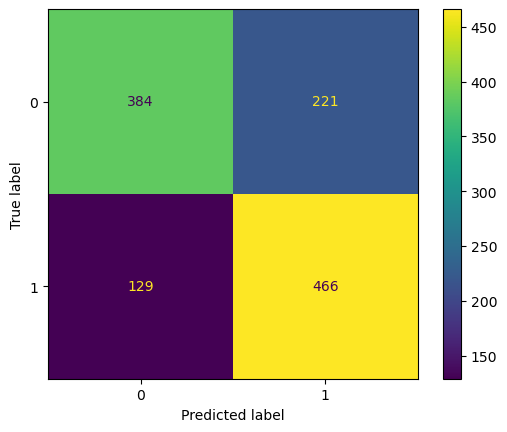

In [66]:
num_batches = 10 
subset_val_labels = []
subset_val_preds = []

for i, (x, y) in enumerate(val_ds):
    if i >= num_batches:
        break
    subset_val_labels.append(y)
    subset_val_preds.append(model.predict(x))

subset_val_labels = np.concatenate(subset_val_labels)
subset_val_preds = np.concatenate(subset_val_preds)
subset_val_pred_classes = (subset_val_preds > 0.5).astype(int)
conf_mat = confusion_matrix(subset_val_labels, subset_val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[0, 1])
disp.plot()